__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [1]:

function MetodoEuler(f,x0,t0,t,h)
 listt=t0:h:t #esto es igual a  "valor inicial":"cuanto avanza cada paso":"valor final"
    #listt son los valores de t   
    listx=[x0]#la listx comienza con el valor inicial x0 y posteriormente con push! se le irán agregando los siguientes puntos
    for i in 1:length(listt)-1
        x0=x0+(h*f(x0,listt[i])) #esta es la fórmula del Método de Euler
        push!(listx,x0)
    end
    return listt,listx
end

MetodoEuler (generic function with 1 method)

In [2]:
f(x,t)=-2.5x #f(x,t)=−αx con α=2.5

f (generic function with 1 method)

In [3]:
#CON X(0)=1
#guardare en listas diferentes los resultados para cada h
listh1=MetodoEuler(f,1.0,0.0,8.0,1.0) #h1=1.0
listh2=MetodoEuler(f,1.0,0.0,8.0,0.5) #h2=0.5
listh3=MetodoEuler(f,1.0,0.0,8.0,0.2) #h3=0.2
listh4=MetodoEuler(f,1.0,0.0,8.0,0.01); #h4=0.01

In [40]:
listt=0.0:1e-5:8.0
exacta=[] #ahora calcularé la solución exacta
for i in 1:7
    sol=e^(-2.5*listt[i])
    push!(exacta,sol)
end

In [41]:
using Plots



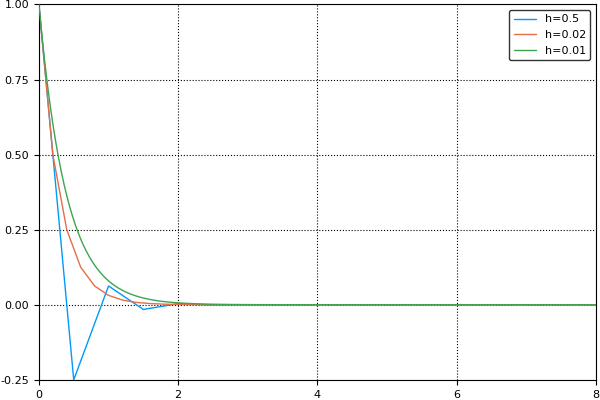

In [44]:
plot(listh2,label="h=0.5")
plot!(listh3,label="h=0.02")
plot!(listh4,label="h=0.01")
plot!(exacta)


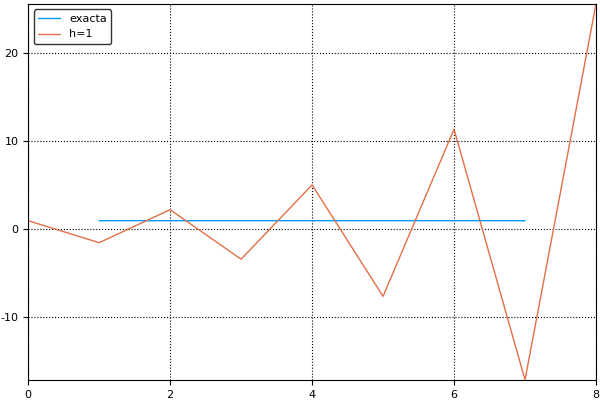

In [51]:

plot(exacta,label="exacta")
plot!(listh1,label="h=1")




In [47]:
#CON X(0)=2
#guardare en listas diferentes los resultados para cada h
list2h1=MetodoEuler(f,2.0,0.0,8.0,1.0) #h1=1.0
list2h2=MetodoEuler(f,2.0,0.0,8.0,0.5) #h2=0.5
list2h3=MetodoEuler(f,2.0,0.0,8.0,0.2) #h3=0.2
list2h4=MetodoEuler(f,2.0,0.0,8.0,0.01); #h4=0.01


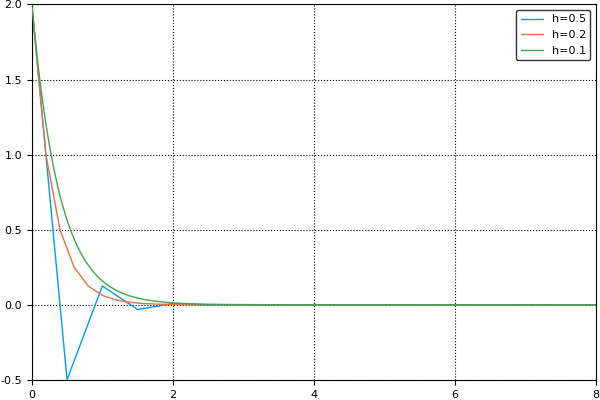

In [54]:

plot(list2h2,label="h=0.5")
plot!(list2h3,label="h=0.2")
plot!(list2h4,label="h=0.1")



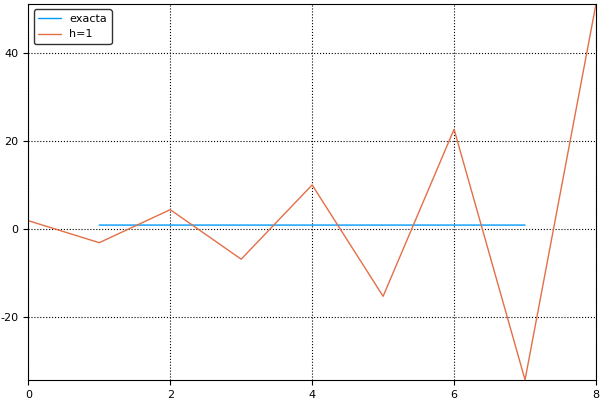

In [58]:
plot(exacta,label="exacta")
plot!(list2h1,label="h=1")


------------------------------------

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.



_Solución:_ La solución de  la ecuación es 
$$x(t)=A cos\left(\sqrt{kt}\right)+ B sen\left(\sqrt{kt}\right)$$
y con $x(0)$ y $x'(0)$
$$x(t)=x(0) cos\left(\sqrt{kt}\right)+ x'(0) sen\left(\sqrt{kt}\right)$$

------------------------------------


__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?



_Solución:_
Sea $u=\dot{x}(t)$ pot lo tanto $\dot{u}=\ddot{x}(t)=-kt$


Por lo tanto $\dot{u}=-kx$

-----------------------

__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

In [14]:
#para más de un sistema, agrego otra función
g(x,t)=-x
f(u,t)=u
function Euler(f,g,x0,u0,t0,t,h)
    listt=t0:h:t #hago las mismas listas que haran lo mismo
    listx=[x0]
    listu=[u0]
    for i in 1:length(listt)-1
    u0=u0+h*g(x0,listt[i])  
    x0=x0+h*f(u0,listt[i]) 
        push!(listx,x0)
        push!(listu,u0)
    end
    return listt,listx
end

Euler (generic function with 1 method)

In [15]:
c=Euler(f,g,0.0,1.0,0.0,2*pi,0.5)
exactaa(t)=sin(t)

exactaa (generic function with 1 method)


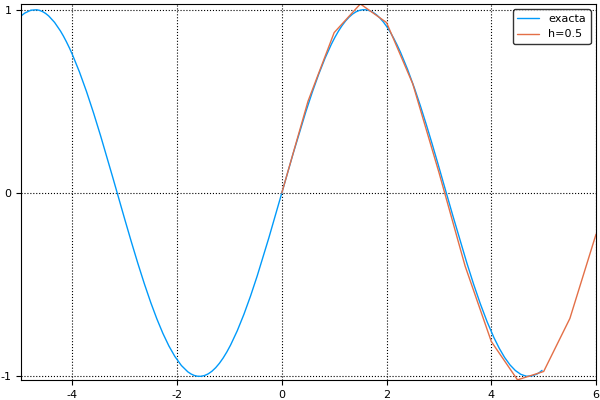

In [16]:
using Plots
plot(exactaa,label="exacta")

plot!(c,label="h=0.5")


___________________________________

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [65]:
f(x,t)=((2*x)-(18*t))/(1+t)


f (generic function with 1 method)

In [66]:
t=linspace(-3,10,20)
aa=[]
for i in 1:length(t)
    z=4+(8*t[i])-(5*t[i]^2)
    push!(aa,z)
end


In [67]:
#Aplicando el método del ejercicio 1
b=MetodoEuler(f,1.0,0.0,10.0,0.01);


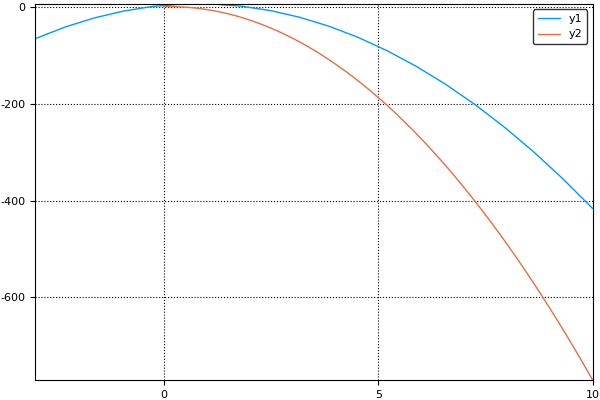

In [68]:
plot(t,aa)
plot!(b)